In [1]:
from microsim import schema as ms
from microsim.util import ortho_plot

sim = ms.Simulation(
    truth_space=ms.ShapeScaleSpace(shape=(256, 512, 512), scale=(0.02, 0.01, 0.01)),
    output_space={"downscale": 8},
    sample=ms.Sample(labels=[ms.MatsLines(density=1, length=8, azimuth=10, max_r=0.9)]),
    modality=ms.Confocal(pinhole_au=0.4),
    detector=ms.CameraCCD(
        qe=0.82, full_well=18000, read_noise=6, bit_depth=12, offset=100
    ),
    settings=ms.Settings(random_seed=100),
    output_path="/home/federico.carrara/Documents/projects/microsim/outputs/exp_out.tiff",
)

### The ground truth

The ground truth is the physical sample, i.e., "*what only God can see*" or what we would see if our eyes would have infinite resolution. <br><br>
The ground truth is defined by:
- the `truth_space`, namely the abstract space in which the simulation is run.<br><br>
- the `sample`, which describes the actual object we want to observe. In particular, samples are declared as a list of `FluorophoreDistribution` objects, which basically specify the distribution of fluorophores in the sample together with the type of fluorophore.<br><br>


In [4]:
ground_truth = sim.ground_truth()
type(ground_truth), ground_truth.shape, ground_truth.coords

(xarray.core.dataarray.DataArray,
 (1, 256, 512, 512),
 Coordinates:
   * z        (z) float64 2kB 0.0 0.02 0.04 0.06 0.08 ... 5.02 5.04 5.06 5.08 5.1
   * y        (y) float64 4kB 0.0 0.01 0.02 0.03 0.04 ... 5.07 5.08 5.09 5.1 5.11
   * x        (x) float64 4kB 0.0 0.01 0.02 0.03 0.04 ... 5.07 5.08 5.09 5.1 5.11
   * f        (f) object 8B distribution=MatsLines(type='matslines', density=1...)

NOTE: `ground_truth` is an `xarray.DataArray`. What is it?

`xarray` is a Python library designed for working with multi-dimensional arrays. It extends the capabilities of numpy arrays by adding labeled axes and dimensions, providing a powerful and flexible way to handle complex datasets. Some features:

- `xarray` allows you to label dimensions (axes) (e.g., dim=0 -> 'x', dim=1 -> 'y', stored in `array.coords`) of the array with meaningful names, making the code more readable and self-documenting. The labels can, for instance, store coordinates, providing context for the data values (e.g., we can define a 2D array describing a grid of values and we can define x and y coordiantes associated to such values).
- `xarray` is built on top of `numpy` and integrates seamlessly with `pandas`, allowing you to leverage the powerful indexing and data manipulation features of `pandas`.
- `xarray` introduces two main data structures:
    - `DataArray`: A single multi-dimensional array with labeled dimensions and coordinates.
    - `Dataset`: A collection of multiple `DataArray` objects, akin to a `pandas` `DataFrame` but for multi-dimensional arrays.

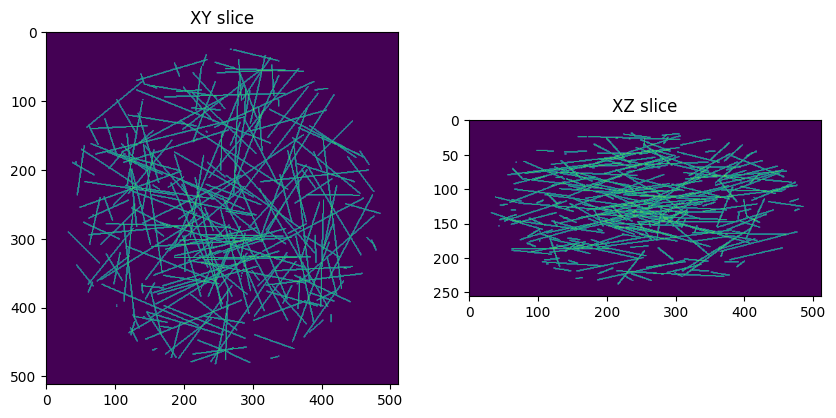

In [7]:
ortho_plot(
    ground_truth, 
    mip=True, # max intensity projection
    cmap='viridis'
)

### The Optical Image

The optical image is the result of the simulation of optical effects of the microscope (e.g., PSF, aberrations, ...) to the ground truth sample. <br>
It clearly depends on the microscope setup (lenses, detector, working distance, ...) and also on the light emitted by the sample. <br>
The computation of optical effects is deterministically computed within `microsim`.

NOTES:
- Optical effects are applied channel-wise on the image (see `channel_idx` parameter) -> this means that it is possible to have multiple channels!
- The computation of optical effects is triggered by calling the `render` method for the given `Modality` object. Observe that `modality` is specified in the first place by the type of microscope (e.g., `modality == Widefield`, `Confocal`, ...). In addition, for a given `modality` it is possible to customize some attributes (e.g., define the PSF -> `make_psf`, define the objective -> `ObjectiveLens` and the optical configuration -> `OpticalConfig`, pinhole, ...) (see `modality._simple.py` for more details).
- All the modality parameters can be specified in the `modality` field of the `Simulation` object.

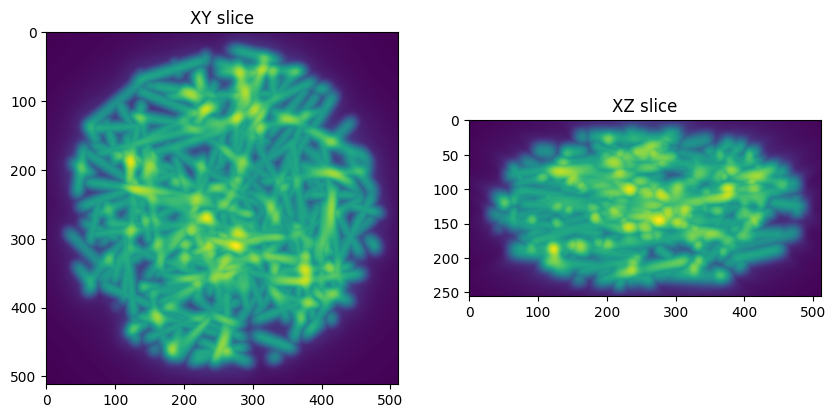

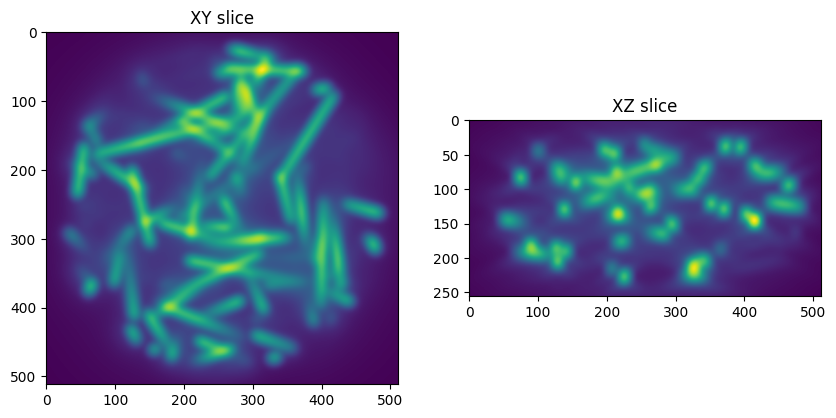

In [9]:
optical_img = sim.optical_image(ground_truth)  # passing ground_truth is optional

ortho_plot(optical_img, mip=True, cmap='viridis')
ortho_plot(optical_img, mip=False, cmap='viridis')